<a href="https://colab.research.google.com/github/ddiaz1999/Taller2_IA/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <strong>PREDICTION OF CRIME USING SVM AND ANN</strong>

*   **<font color='red'> Problema </font>** 
##### Analizar el data set proporcionado sobre crímenes en la ciudad de Boston y predecir el crimen por mes, día y por lugar.

*   **<font color='red'> Dataset </font>** 
##### El *dataset* es tomado de [<font color='purple'><i>**Kaggle**<i></font>](https://www.kaggle.com/), estos datos son de dominio público. [<font color='blue'><i>**Ver dataset**<i></font>](https://www.kaggle.com/AnalyzeBoston/crimes-in-boston)
<br>

---
---

---
---

#####Desarrollado por: 
<h6 align=center> ${\text{Jhon Hader Fernández}}$ <h6>
<h6 align=center> ${\text{Diego Fernando Díaz}}$ <h6>
<h6 align=center> ${\text{Oscar Geovanny Baracaldo}}$ <h6>

#####<h6 align=center>{<i>jhon_fernandez, di-diego, obaracaldo</i>}@javeriana.edu.co<h6>
#####<h6 align=center>Pontificia Universidad Javeriana<h6>

<br>


## ***1. ENTORNO DE TRABAJO***

Para el desarrollo del código se requiere de algunos paquetes, módulos y librerías externas.

### ***1.2.  IMPORTAR PAQUETES Y LIBRERÍAS*** 

In [27]:
## Iniciamos por importar las librerias a utilizar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import os
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
pd.set_option('display.max_rows', None)
import datetime
from plotly.subplots import make_subplots
 
%matplotlib inline 
import seaborn as sns 
import folium 
from folium.plugins import HeatMap


## ***2. ANÁLISIS DE DATOS***

Inicialmente se debe hacer un análisis exploratorio de los datos, que darán información sobre el tipo de datos, la cantidad, los formatos de archivos, etc.

### ***2.1.  OBTENER DATASET*** 
* **<font color='green'><i> 2.1.1. </i></font>** <br>
 El **dataset**  es cargado desde una carpeta de **<font color='magenta'> Google drive </font>** por ello se debe obtener la ruta de la carpeta, para ello se solicitará un permiso de acceso a **<font color='magenta'> Google drive </font>**

* **<font color='green'><i> 2.1.2. </i></font>** <br>
Obtener la ruta de los archivos

* **<font color='green'><i> 2.1.3. </i></font>** <br>
Leer el archivo **<font color='red'> `crime.csv` </font>**

In [28]:
# 2.1.1
path = '/content/drive/My Drive/TALLER 2 IA/dataset'

# 2.1.2
files = []
path_files = {}
for dirname, _, filenames in os.walk(path):
  for file in filenames:
    files.append(os.path.join(path,file))

path_files['crime'], path_files['ofense code'] = files[0], files[1]

# 2.1.3
data = pd.read_csv(path_files['crime'], encoding='latin')
data.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [29]:
print('Shape of dataframe (samples, features):', data.shape, '\n')

columns = data.columns.tolist()
chart = PrettyTable(["Index", "Feature"])
for i, characteristic in enumerate(columns):
   options = data[characteristic].value_counts()
   options = list(options.keys())
   chart.add_row([i+1, characteristic])

print('Feature and its options:')
print(chart,  '\n')

Shape of dataframe (samples, features): (319073, 17) 

Feature and its options:
+-------+---------------------+
| Index |       Feature       |
+-------+---------------------+
|   1   |   INCIDENT_NUMBER   |
|   2   |     OFFENSE_CODE    |
|   3   |  OFFENSE_CODE_GROUP |
|   4   | OFFENSE_DESCRIPTION |
|   5   |       DISTRICT      |
|   6   |    REPORTING_AREA   |
|   7   |       SHOOTING      |
|   8   |   OCCURRED_ON_DATE  |
|   9   |         YEAR        |
|   10  |        MONTH        |
|   11  |     DAY_OF_WEEK     |
|   12  |         HOUR        |
|   13  |       UCR_PART      |
|   14  |        STREET       |
|   15  |         Lat         |
|   16  |         Long        |
|   17  |       Location      |
+-------+---------------------+ 



## ***3. PRE-PROCESAMIENTO DE DATOS***
Se debe ajustar y acondicionar los datos a los requerimientos del modelo.

### ***3.1.  RENOMBRAR Y ESCOGER CARACTERÍSTICAS*** 

* **<font color='green'><i> 3.1.1. </i></font>** <br>
Se realiza un renombramiento a las siguientes características:

<br>
<h6 align=center><b> ${\text{Tabla 1. Features rename}}$ </b><h6>

|    ${\text{Original name}}$    |    ${\text{Rename}}$   |
|:------------------------------:|:----------------------:|
|     ${\text{OFFENSE_CODE}}$    |     ${\text{Code}}$    |
| ${\text{OFFENSE_CODE_GROUP}}$  |     ${\text{Group}}$   |
| ${\text{OFFENSE_DESCRIPTION}}$ | ${\text{Description}}$ |
|   ${\text{OCURRED_ON_DATE}}$   |     ${\text{Date}}$    |


Los renombramientos se realizan para facilitar su recocimiento a la hora de codificar (realizar la programación).

<br>

* **<font color='green'><i> 3.1.2. </i></font>** <br>
Se eliminan las siguientes caracteristicas pues no se consideran relevantes:

  - INCIDENT_NUMBER
  - Code
  - SHOOTING
  - UCR_PART
  - Lat
  - Long
  - Location

Lo anterior se justifica de la siguiente manera: La problemática planteada es predecir un **<font color='orange'><i> crimen </i></font>** de acuerdo a una **<font color='red'><i> fecha </i></font>** y **<font color='red'><i> lugar </i></font>**, por ello la característica de interés a predecir es el crimen (**<font color='purple'><i> Group </i></font>**) las demás características ligadas a esta no son de interés (**número de incidente, código, parte de UCR**),
para obtener las fechas de toman todas las caracteristicas relacionadas a esta (**año, mes, día, hora, día de la semana**) y para obtener las características de lugar se toman todas las relacionadas a ella (**calle, area de reporte, distrito**) a excepción de la **longitud** y **latitud**, pues se considera que no se necesita ese nivel de precisión en la ubicación de un lugar.

* **<font color='green'><i> 3.1.3. </i></font>** <br>
Eliminar datos perdidos

In [30]:
# 3.1.1
data = data.rename(columns={'OFFENSE_CODE':'Code','OFFENSE_CODE_GROUP':'Group','OFFENSE_DESCRIPTION':'Description','OCCURRED_ON_DATE':'Date'})

# 3.1.2
data.drop(['INCIDENT_NUMBER','Description','Code','SHOOTING','UCR_PART','Lat','Long','Location'],inplace=True,axis=1)

# 3.1.3
data = data.dropna()
data.head()

,Group,DISTRICT,REPORTING_AREA,Date,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET
0,Larceny,D14,808,2018-09-02 13:00:00,2018,9,Sunday,13,LINCOLN ST
1,Vandalism,C11,347,2018-08-21 00:00:00,2018,8,Tuesday,0,HECLA ST
2,Towed,D4,151,2018-09-03 19:27:00,2018,9,Monday,19,CAZENOVE ST
3,Investigate Property,D4,272,2018-09-03 21:16:00,2018,9,Monday,21,NEWCOMB ST
4,Investigate Property,B3,421,2018-09-03 21:05:00,2018,9,Monday,21,DELHI ST


### ***3.2.  OBTENER SERIES DE TIEMPOS*** 
Se obtiene la serie de tiempo, para ello, se compacta la fecha (año/mes/día:hora) en el formato **<font color='green'> `datetime` </font>**.
Es decir, la caracteristica **<font color='red'> 'Date' </font>** tiene que ser del formato ya mencionado.

In [31]:
data['Date']=pd.to_datetime(data['Date'])
data.index=pd.DatetimeIndex(data.Date)
data.info() 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 307484 entries, 2018-09-02 13:00:00 to 2015-06-22 00:12:00
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Group           307484 non-null  object        
 1   DISTRICT        307484 non-null  object        
 2   REPORTING_AREA  307484 non-null  object        
 3   Date            307484 non-null  datetime64[ns]
 4   YEAR            307484 non-null  int64         
 5   MONTH           307484 non-null  int64         
 6   DAY_OF_WEEK     307484 non-null  object        
 7   HOUR            307484 non-null  int64         
 8   STREET          307484 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 23.5+ MB


### ***3.3.  CRIMENES*** 
Gráfica de la distribución de cantidad de crimenes

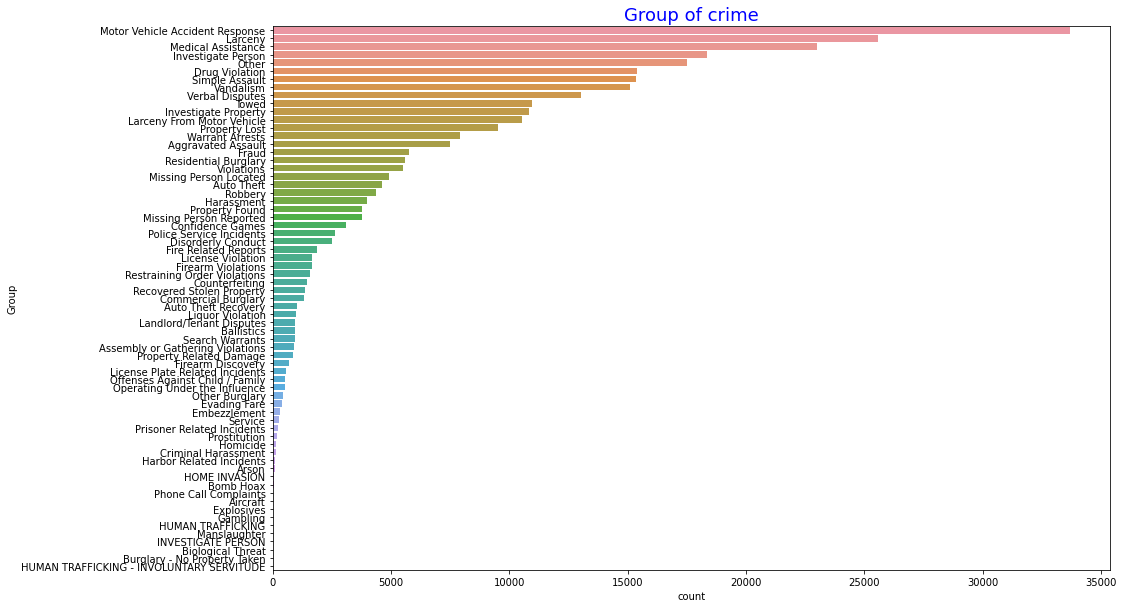

In [32]:
order_data = data['Group'].value_counts().index
plt.figure(figsize=(15,10))
plt.title('Group of crime', fontsize=18, color='blue') 
sns.countplot(y='Group', data=data, order=order_data)
plt.ioff()

### ***3.4.  CODIFICACIÓN DE CRIMENES*** 

En el siguiente bloque se realiza la codificacion **<font color='blue'> `integer` </font>** a los datos categóricos del dataset. Esto se realiza con la finalidad de no aumentar la dimensionalidad del problema.

La codificación se realiza con el criterio de ocurrencia de manera ascendente, es decir, la opción de alguna característica que tenga menor ocurrencia tomará la etiqueta 0, la siguente tomará la etiqueta 1, y así sucesivamente hasta la última opción de su respectiva característica. 

In [33]:
def integer_encoder(data_frame,column):
    map_to_encode = {}
    serie = data_frame[column].value_counts(normalize=True, sort=True).reset_index()
    serie.sort_values(by=[column], ascending=True, inplace=True)
    serie.reset_index(drop=True, inplace=True)
    for index, row in serie.iterrows():
        map_to_encode[row['index']] = index
    data_frame[column] = data_frame[column].map(map_to_encode).astype(int)        
    return data_frame[column]


mapeo=data['Group'].value_counts()
crime_labels = list(mapeo.keys())
crime_labels.reverse()

data['Group'] = integer_encoder(data,'Group')
data['DISTRICT'] = integer_encoder(data,'DISTRICT')
data['REPORTING_AREA'] = integer_encoder(data,'REPORTING_AREA')
data['REPORTING_AREA'] = integer_encoder(data,'REPORTING_AREA')
data['DAY_OF_WEEK'] = integer_encoder(data,'DAY_OF_WEEK')
data['STREET'] = integer_encoder(data,'STREET')

data.head()

,Group,DISTRICT,REPORTING_AREA,Date,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET
Date,,,,,,,,,
2018-09-02 13:00:00,65,5,258,2018-09-02 13:00:00,2018,9,0,13,4228
2018-08-21 00:00:00,59,10,757,2018-08-21 00:00:00,2018,8,3,0,3676
2018-09-03 19:27:00,57,9,666,2018-09-03 19:27:00,2018,9,2,19,1521
2018-09-03 21:16:00,56,9,630,2018-09-03 21:16:00,2018,9,2,21,2810
2018-09-03 21:05:00,56,8,621,2018-09-03 21:05:00,2018,9,2,21,3713


### ***3.5.  OBTENER CONJUNTO DE ENTRENAMIENTO Y PRUEBAS***

En el siguiente bloque se ajusta el dataset y se divide en los datos de entrenamiento y los datos de prueba, al mismo tiempo estos se escalizan

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

def Data_scalization(X_train, X_validation,X_test):
  scalization = MinMaxScaler()
  scalization.fit(X_train)
  X_train = scalization.transform(X_train)
  X_validation = scalization.transform(X_validation)
  X_test = scalization.transform(X_test)
  return X_train, X_validation, X_test

data.drop(['Date'],inplace=True,axis=1)

y = data['Group'].values
X = data.drop(['Group'], axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
X_validation, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5)
X_train, X_validation, X_test = Data_scalization(X_train,X_validation,X_test)

## ***4. MODELO***
Se utiliza el modelo de máquina de soporte vectorial (SVM) en modo de clasificación y redes neuronales artificiales (ANN).


### ***4.1.  SVM*** 

En la siguiente celda se crea el modelo de máquinas de soporte vectorial. Se realiza el entrenamiento y con los resultados obtenidos se muestra el crimen predicho por el modelo junto con el 'accuracy score' del mismo.

Para el modelo SVC se probó con kernel tipo lineal, rbf, sigmoide y polinómico, obteniendo mejores resultados con el polinómico de orden 15, en concreto se obtuvo un accuracy score del 9.6 %

In [35]:
from sklearn import decomposition
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

model = SVC(kernel='poly', degree=15, verbose=1, max_iter=130)

print("Training...")
model.fit(X_train, y_train)
print("Calculating prediction...")
prediction = model.predict(X_test)
crime_results = []
for i in prediction:
  crime_results.append(crime_labels[i])

print('Prediction codification', prediction)
print('crime predicted according to codification', crime_results)
print('output results (y_test)', y_test)
acc_score = accuracy_score(y_test, prediction)   
print ('{0}: {1}'.format('SVM accuracy score: ', acc_score))

Training...
[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=130).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



Calculating prediction...
Prediction codification [66 66 66 ... 12 66 65]
crime predicted according to codification ['Motor Vehicle Accident Response', 'Motor Vehicle Accident Response', 'Motor Vehicle Accident Response', 'Larceny', 'Motor Vehicle Accident Response', 'Other', 'Motor Vehicle Accident Response', 'Motor Vehicle Accident Response', 'Larceny', 'Other Burglary', 'Motor Vehicle Accident Response', 'Motor Vehicle Accident Response', 'Larceny', 'Motor Vehicle Accident Response', 'Larceny', 'Motor Vehicle Accident Response', 'Motor Vehicle Accident Response', 'Motor Vehicle Accident Response', 'Motor Vehicle Accident Response', 'Larceny', 'Medical Assistance', 'Motor Vehicle Accident Response', 'Prisoner Related Incidents', 'Motor Vehicle Accident Response', 'Motor Vehicle Accident Response', 'Motor Vehicle Accident Response', 'Motor Vehicle Accident Response', 'Motor Vehicle Accident Response', 'Motor Vehicle Accident Response', 'Motor Vehicle Accident Response', 'Medical Assis

### ***4.2.  ARTIFICIAL NEURAL NETWORK*** 

A continuación se implementa el modelo de red neuronal. En primer lugar se definen los parámetros como el numero de épocas, y luego parámetros intrínsecos como la cantidad de neuronas en cada capa, la función de activación usada en cada una, etc. Se prosigue a entrenar el modelo con los datos procesados previamente y se muestra el rendimiento de este modelo en particular.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

topology = [30, 30, 67]

model = tf.keras.Sequential([
  layers.Dense(topology[0], activation='relu', input_dim=7),
  layers.Dense(topology[1], activation = 'relu'),
  layers.Dense(topology[2], activation = 'softmax') 
])
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

batch_size = 512
n_epochs = 54
n_train = len(X_train)
n_val = len(X_validation)

history = model.fit(
  X_train, 
  y_train,
  steps_per_epoch=n_train // batch_size,
  validation_data=(X_validation, y_val),
  epochs=n_epochs,
  validation_steps=n_val // batch_size,
  verbose=2,
)

results = model.evaluate(X_test, y_test, batch_size=batch_size)
print("test loss, test acc:", results)